In [3]:
import os
import glob
import json
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
cwd = os.getcwd()
result_dir = os.path.join(cwd, "../", "result")
down_dir = os.path.join(cwd, "../", "downloads")

info_dir = os.path.join(result_dir, "video_url")
repr_dir = os.path.join(result_dir, "represent")
anlz_dir = os.path.join(result_dir, "analyzed")
sort_dir = os.path.join(result_dir, "sorted")

In [5]:
video_list = glob.glob(os.path.join(down_dir, '*.mp4'))

In [6]:
sorted_list = glob.glob(os.path.join(sort_dir, "*", "*.jpg"))

In [9]:
image_names = [os.path.basename(img).split(".")[0] for img in sorted_list]

In [11]:
print(len(image_names))
print(image_names)

4919
['11210764_02', '11211063_02', '11211362_01', '11211661_02', '11212558_01', '1123887_01', '1125083_01', '112598_01', '1126877_02', '1128073_02', '112897_01', '11613156_02', '1162990_01', '116299_01', '1164485_02', '1169269_02', '350_02', '3510764_02', '3511063_01', '3511362_03', '3511661_02', '3511960_01', '351196_03', '3512259_01', '3512558_03', '3512857_03', '3513156_03', '3513455_03', '3513754_03', '3514053_02', '3514352_02', '3514651_02', '3514950_02', '351495_03', '3515249_03', '3515548_03', '3516445_03', '3516744_02', '3517043_02', '3517940_03', '351794_03', '3518837_03', '3519435_01', '3520033_02', '352093_03', '3521528_01', '3522126_02', '3523023_03', '3523322_03', '3523621_02', '3523920_01', '352392_02', '3524219_03', '3524518_03', '3525415_02', '3526312_02', '3526611_02', '3526910_01', '352691_03', '3527209_01', '3527508_01', '3527807_01', '3528405_02', '3528704_01', '3529302_01', '3529900_03', '352990_03', '3530199_03', '3531096_01', '3532292_01', '353289_03', '3533488_

In [38]:
try:
    with open(os.path.join(info_dir, "image_to_title.json"), "r", encoding = "UTF-8-SIG") as f:
        image_to_title = json.load(f, ensure_ascii=False)
    print("Saved File Loaded!")
except:
    image_to_title = {}

gennames = {name : name.split("_")[0] for name in image_names}
gname_key = list(gennames.keys())
gname_val = list(gennames.values())
    
for idx, video in enumerate(tqdm.tqdm(video_list)):
        filename = os.path.basename(video).split(".")[0]
        
        target_video = cv2.VideoCapture(video)

        # Find OpenCV version
        (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

        if int(major_ver)  < 3 :
            fps = target_video.get(cv2.cv.CV_CAP_PROP_FPS)
        else :
            fps = target_video.get(cv2.CAP_PROP_FPS)
        
        count = 0
        while True:
            success, image = target_video.read()
            
            if not success:
                break

            gen_name = f"{idx}{count}"

            if gen_name in gname_val:
                g_idx = [i for i, x in enumerate(gname_val) if x == gen_name]
                keys = [gname_key[gi] for gi in g_idx]
                for key in keys:
                    image_to_title[key] = filename
            count += 1
        
        target_video.release()

with open(os.path.join(info_dir, "image_to_title.json"), "w", encoding = "UTF-8-SIG") as file_out:
    json.dump(image_to_title, file_out, ensure_ascii=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139/139 [08:43<00:00,  3.77s/it]


In [39]:
print(len(image_to_title.keys()))

4773


In [40]:
for name in tqdm.tqdm(image_names):
    try:
        image_to_title[name]
    except:
        image_to_title[name] = "Not Found Yet"
        print(f"Title not Found for {name}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4919/4919 [00:00<00:00, 983542.99it/s]

Title not Found for 3917641_01
Title not Found for 3918239_03
Title not Found for 3930498_01
Title not Found for 3933189_02
Title not Found for 5321229_01
Title not Found for 5322425_01
Title not Found for 5324817_01
Title not Found for 3916146_01
Title not Found for 3918538_01
Title not Found for 3921827_01
Title not Found for 3929900_01
Title not Found for 220100_02
Title not Found for 220400_02
Title not Found for 220700_02
Title not Found for 11012428_01
Title not Found for 4040963_01
Title not Found for 5117500_02
Title not Found for 11016730_01
Title not Found for 7712259_01
Title not Found for 7712857_01
Title not Found for 7713156_01
Title not Found for 7714053_01
Title not Found for 7714352_01
Title not Found for 3917043_03
Title not Found for 3930797_01
Title not Found for 9616146_01
Title not Found for 220100_01
Title not Found for 220400_01
Title not Found for 220700_01
Title not Found for 13014651_01
Title not Found for 13016146_02
Title not Found for 12110277_01
Title not

In [41]:
nfy_count = 0
for val in image_to_title.values():
    if val == "Not Found Yet":
        nfy_count+=1
print(nfy_count)

145


In [53]:
 with open(os.path.join(anlz_dir, "analysis_result.json"), "r", encoding = "UTF-8-SIG") as f:
    analysis = json.load(f)

In [62]:
def softmax(x):
    y = np.exp(x - np.max(x))
    f_x = y / np.sum(np.exp(x))
    return f_x

In [76]:
search_results = glob.glob(os.path.join(info_dir, "*.json"))
video_info = dict()
for s_path in search_results:
    with open(s_path, 'r', encoding = "UTF-8-SIG") as file_load:
        s_dict = json.load(file_load)
        video_info.update(s_dict)

In [91]:
list_sort_dir = glob.glob(os.path.join(sort_dir, "*"))
indivisual_result = {}
for cont in tqdm.tqdm(list_sort_dir):
    face_id = os.path.basename(cont)
    indivisual_result[face_id] = {}
    target_names = [name.split(".")[0] for name in os.listdir(cont)]
    emotion = np.zeros((7,))
    age = []
    gender = np.zeros((2,))
    race = np.zeros((6,))
    view = 0
    
    for name in target_names:
        try:
            a_dict = analysis[name]
            emotions = list(a_dict["emotion"].keys())
            emotion += np.array(list(a_dict["emotion"].values()))
            age.append(a_dict["age"])
            if gender == "Man":
                gender[1] += 1
            else:
                gender[0] += 1
            races = list(a_dict["race"].keys())
            race += np.array(list(a_dict["race"].values()))
            
            view += int(video_info[image_to_title[name]]["viewCount"])
        except:
            pass
            
    emotion /= np.sum(emotion)
    age = np.mean(age)
    gender = softmax(gender)
    gender /= np.sum(gender)
    race /= np.sum(race)
    view = np.log10(view)
    
    indivisual_result[face_id]["emotion"] = {k:v for k,v in zip(emotions, emotion)}
    indivisual_result[face_id]["age"] = age
    indivisual_result[face_id]["gender"] = {"female" : gender[0], "male" : gender[1]}
    indivisual_result[face_id]["gender_d"] = "female" if gender[0] >= gender[1] else "male"
    indivisual_result[face_id]["race"] = {k : v for k,v in zip(races, race)}
    indivisual_result[face_id]["race_d"] = races[np.argmax(race)]
    indivisual_result[face_id]["reaction score"] = view
    
with open(os.path.join(anlz_dir, "indivisual_result.json"), "w", encoding = "UTF-8-SIG") as file_out:
    json.dump(indivisual_result, file_out, ensure_ascii=False)

  0%|                                                                                                                                                             | 0/111 [00:00<?, ?it/s]<ipython-input-91-7214dafcc1d9>:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if gender == "Man":
<ipython-input-91-7214dafcc1d9>:35: RuntimeWarning: divide by zero encountered in log10
  view = np.log10(view)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 1441.25it/s]


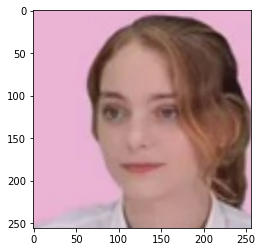

{'emotion': {'angry': 0.004061825154617022, 'disgust': 0.00010859419325413704, 'fear': 0.2064692430773126, 'happy': 0.21023410667667314, 'sad': 0.24651508664771424, 'surprise': 0.03792967861095094, 'neutral': 0.294681465639478}, 'age': 30.4875, 'gender': {'female': 1.0, 'male': 1.8048513878454153e-35}, 'gender_d': 'female', 'race': {'asian': 0.10541191519732661, 'indian': 0.01756166739256781, 'black': 0.0017709896883807822, 'white': 0.5666781469204882, 'middle eastern': 0.19085033125565484, 'latino hispanic': 0.1177269495455817}, 'race_d': 'white', 'reaction score': 7.089293243419367}


In [92]:
img_path = os.path.join(sort_dir, "10", "20_02.jpg")

%matplotlib inline
pil_im = Image.open(img_path)
plt.imshow(np.asarray(pil_im))
plt.show()
print(indivisual_result["10"])